# 1. Geopandas (Python script)

1.7 Ubicar las universidades en un mapa del Perú. Para ello, crear un mapa con las universidades públicas y distinga entre aquellas que recibieron licenciamiento o no. Luego, crear otro mapa con la misma información pero en el caso de universidades privadas.

In [1]:
# objects from Geopandas 
import matplotlib.pyplot as plt 
import chardet
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString


# Import libraries for Folium to create heatmap
import folium
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

import pandas as pd
import numpy as np
import html5lib
import os
import sys
import time
import lxml

import contextily as cx  # import street map
#from pyproj import CRS

In [2]:
base = pd.read_excel(r'../../Entrega_TF/Grupo2/Base_Universidad_WG2.xlsx')
base = base.drop(columns = 'Unnamed: 0' )
base

,UNIVERSIDAD,DEPARTAMENTO,PROVINCIA,DISPOSITIVO LEGAL DE CREACIÓN,FECHA DE CREACIÓN,DISPOSITIVO LEGAL DE LICENCIAMIENTO,FECHA DE PUB. DIARIO EL PERUANO,DISPOSITIVO LEGAL DE LICENCIAMIENTO O DENEGATORIA,CONDICIÓN JURÍDICA,PAIS,Tipo,Licencia,COORDENADAS,Direccion,Latencia,Longitud
0,Universidad Nacional Mayor de San Marcos,Lima,Lima,Real Cédula de Fundación,12/05/1551,Res. N° 036-2018-SUNEDU/CD,04/04/2018,NaN,NaN,Peru,0,1,"('Universidad Nacional Mayor de San Marcos, Li...","Universidad Nacional Mayor de San Marcos, Lima...",-12.056158,-77.084520
1,Universidad Nacional de San Cristóbal de Huamanga,Ayacucho,Huamanga,Ley N° 12828,03/07/1677,Res. N° 050-2018-SUNEDU/CD,01/06/2018,NaN,NaN,Peru,0,1,('Universidad Nacional de San Cristóbal de Hua...,Universidad Nacional de San Cristóbal de Huama...,-13.161248,-74.225772
2,Universidad Nacional de San Antonio Abad del C...,Cusco,Cusco,Real Cédula de Fundación,01/06/1692,Res. N° 059-2019-SUNEDU/CD,04/05/2019,NaN,NaN,Peru,0,1,('Universidad Nacional de San Antonio Abad del...,Universidad Nacional de San Antonio Abad del C...,-13.521930,-71.958321
3,Universidad Nacional de Trujillo,La Libertad,Trujillo,Decreto Directoral,10/05/1824,Res. N° 127-2018-SUNEDU/CD,20/09/2018,NaN,NaN,Peru,0,1,"('Universidad Nacional de Trujillo, La Liberta...","Universidad Nacional de Trujillo, La Libertad,...",-8.114272,-79.038373
4,Universidad Nacional de San Agustín de Arequipa,Arequipa,Arequipa,Acta de Instalación,11/11/1828,Res. N° 098-2018-SUNEDU/CD,27/08/2018,NaN,NaN,Peru,0,1,('Universidad Nacional de San Agustín de Arequ...,Universidad Nacional de San Agustín de Arequip...,-16.397093,-71.537203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Universidad Santo Tomás de Aquino de Ciencia e...,Junín,Huancayo,Res. N° 407-2012-CONAFU,25/07/2012,NaN,NaN,NaN,Societaria,Peru,1,0,('Universidad Santo Tomás de Aquino de Ciencia...,Universidad Santo Tomás de Aquino de Ciencia e...,-12.084047,-75.208488
139,Universidad Privada SISE,Lima,Lima,Res. N° 408-2012-CONAFU,25/07/2012,NaN,NaN,NaN,Societaria,Peru,1,0,"('Universidad Privada SISE, Lima, Lima,Peru', ...","Universidad Privada SISE, Lima, Lima,Peru",-12.121144,-77.025658
140,Universidad Seminario Evangélico de Lima (*12),Lima,Lima,Ley N° 30220,09/07/2014,NaN,NaN,NaN,Asociativa,Peru,1,0,('Universidad Seminario Evangélico de Lima (*1...,Universidad Seminario Evangélico de Lima (*12)...,-12.063959,-76.960074
141,Universidad Seminario Bíblico Andino (*12),Lima,Lima,Ley N° 30220,09/07/2014,NaN,NaN,NaN,Asociativa,Peru,1,0,"('Universidad Seminario Bíblico Andino (*12), ...","Universidad Seminario Bíblico Andino (*12), Li...",-12.069621,-77.053398


In [3]:
base2 = gpd.GeoDataFrame( base, geometry=gpd.points_from_xy( base.Longitud, base.Latencia ) )
base2.head(60)

,UNIVERSIDAD,DEPARTAMENTO,PROVINCIA,DISPOSITIVO LEGAL DE CREACIÓN,FECHA DE CREACIÓN,DISPOSITIVO LEGAL DE LICENCIAMIENTO,FECHA DE PUB. DIARIO EL PERUANO,DISPOSITIVO LEGAL DE LICENCIAMIENTO O DENEGATORIA,CONDICIÓN JURÍDICA,PAIS,Tipo,Licencia,COORDENADAS,Direccion,Latencia,Longitud,geometry
0,Universidad Nacional Mayor de San Marcos,Lima,Lima,Real Cédula de Fundación,12/05/1551,Res. N° 036-2018-SUNEDU/CD,04/04/2018,NaN,NaN,Peru,0,1,"('Universidad Nacional Mayor de San Marcos, Li...","Universidad Nacional Mayor de San Marcos, Lima...",-12.056158,-77.084520,POINT (-77.08452 -12.05616)
1,Universidad Nacional de San Cristóbal de Huamanga,Ayacucho,Huamanga,Ley N° 12828,03/07/1677,Res. N° 050-2018-SUNEDU/CD,01/06/2018,NaN,NaN,Peru,0,1,('Universidad Nacional de San Cristóbal de Hua...,Universidad Nacional de San Cristóbal de Huama...,-13.161248,-74.225772,POINT (-74.22577 -13.16125)
2,Universidad Nacional de San Antonio Abad del C...,Cusco,Cusco,Real Cédula de Fundación,01/06/1692,Res. N° 059-2019-SUNEDU/CD,04/05/2019,NaN,NaN,Peru,0,1,('Universidad Nacional de San Antonio Abad del...,Universidad Nacional de San Antonio Abad del C...,-13.521930,-71.958321,POINT (-71.95832 -13.52193)
3,Universidad Nacional de Trujillo,La Libertad,Trujillo,Decreto Directoral,10/05/1824,Res. N° 127-2018-SUNEDU/CD,20/09/2018,NaN,NaN,Peru,0,1,"('Universidad Nacional de Trujillo, La Liberta...","Universidad Nacional de Trujillo, La Libertad,...",-8.114272,-79.038373,POINT (-79.03837 -8.11427)
4,Universidad Nacional de San Agustín de Arequipa,Arequipa,Arequipa,Acta de Instalación,11/11/1828,Res. N° 098-2018-SUNEDU/CD,27/08/2018,NaN,NaN,Peru,0,1,('Universidad Nacional de San Agustín de Arequ...,Universidad Nacional de San Agustín de Arequip...,-16.397093,-71.537203,POINT (-71.53720 -16.39709)
5,Universidad Nacional de Ingeniería,Lima,Lima,Ley N° 12379,19/07/1955,Res. N° 073-2017-SUNEDU/CD,28/11/2017,NaN,NaN,Peru,0,1,"('Universidad Nacional de Ingeniería, Lima, Li...","Universidad Nacional de Ingeniería, Lima, Lima...",-12.023179,-77.047630,POINT (-77.04763 -12.02318)
6,Universidad Nacional Agraria La Molina,Lima,Lima,Ley N° 13417,08/04/1960,Res. N° 011-2017-SUNEDU/CD,20/03/2017,NaN,NaN,Peru,0,1,"('Universidad Nacional Agraria La Molina, Lima...","Universidad Nacional Agraria La Molina, Lima, ...",-12.081749,-76.943190,POINT (-76.94319 -12.08175)
7,Universidad Nacional San Luis Gonzaga,Ica,Ica,Ley N° 12495,20/12/1955,NaN,NaN,NaN,NaN,Peru,0,0,"('Universidad Nacional San Luis Gonzaga, Ica, ...","Universidad Nacional San Luis Gonzaga, Ica, Ic...",-14.087132,-75.733515,POINT (-75.73351 -14.08713)
8,Universidad Nacional del Centro del Perú,Junín,Huancayo,Ley N° 13827,02/01/1962,Res. N° 022-2019-SUNEDU/CD,01/03/2019,NaN,NaN,Peru,0,1,"('Universidad Nacional del Centro del Perú, Ju...","Universidad Nacional del Centro del Perú, Juní...",-12.033046,-75.237332,POINT (-75.23733 -12.03305)
9,Universidad Nacional de la Amazonía Peruana,Loreto,Maynas,Ley N° 13498,14/01/1961,Res. N° 012-2019-SUNEDU/CD,01/02/2019,NaN,NaN,Peru,0,1,"('Universidad Nacional de la Amazonía Peruana,...","Universidad Nacional de la Amazonía Peruana, L...",-3.745989,-73.245699,POINT (-73.24570 -3.74599)


In [4]:
publica = base2[ base2.Tipo == 0]
privada = base2[ base2.Tipo == 1]


In [5]:
publicaL = publica[ publica.Licencia == 1]
publicaNL = publica[ publica.Licencia == 0]
privadaL = privada[ privada.Licencia == 1]
privadaNL = privada[ privada.Licencia == 0]


# Shapefile

In [6]:
mapa = gpd.read_file(r'../../Entrega_TF/Grupo2/shape_file/DISTRITOS.shp')

mapa

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...,...,...,...,...,...,...,...,...,...
1868,10,HUANUCO,1006,LEONCIO PRADO,100608,CASTILLO GRANDE,CASTILLO GRANDE,0001,1,INEI,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,10,HUANUCO,1006,LEONCIO PRADO,100609,PUEBLO NUEVO,PUEBLO NUEVO,0001,1,INEI,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,10,HUANUCO,1006,LEONCIO PRADO,100610,SANTO DOMINGO DE ANDA,PACAE,0001,1,INEI,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,21,PUNO,2111,SAN ROMAN,211105,SAN MIGUEL,SAN MIGUEL,0001,1,INEI,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [7]:
mapa.geometry

0       POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...
1       POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...
2       POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...
3       POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...
4       POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...
                              ...                        
1868    POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...
1869    POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...
1870    POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...
1871    POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...
1872    POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...
Name: geometry, Length: 1873, dtype: geometry

In [8]:
mapa = mapa.rename({'IDDIST':'UBIGEO'}, axis =1 )
mapa = mapa.rename({'DEPARTAMEN':'DEPARTAMENTO'}, axis =1 )
mapa 

,IDDPTO,DEPARTAMENTO,IDPROV,PROVINCIA,UBIGEO,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...,...,...,...,...,...,...,...,...,...
1868,10,HUANUCO,1006,LEONCIO PRADO,100608,CASTILLO GRANDE,CASTILLO GRANDE,0001,1,INEI,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,10,HUANUCO,1006,LEONCIO PRADO,100609,PUEBLO NUEVO,PUEBLO NUEVO,0001,1,INEI,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,10,HUANUCO,1006,LEONCIO PRADO,100610,SANTO DOMINGO DE ANDA,PACAE,0001,1,INEI,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,21,PUNO,2111,SAN ROMAN,211105,SAN MIGUEL,SAN MIGUEL,0001,1,INEI,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [9]:
mapa['centroid'] = mapa['geometry'].centroid
mapa

C:\Users\Hp\AppData\Local\Temp\ipykernel_14368\1928952988.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mapa['centroid'] = mapa['geometry'].centroid


,IDDPTO,DEPARTAMENTO,IDPROV,PROVINCIA,UBIGEO,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry,centroid
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",POINT (-75.46654 -9.63436)
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",POINT (-74.86638 -9.00132)
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...",POINT (-75.04802 -8.82493)
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...",POINT (-75.27992 -8.95052)
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...",POINT (-75.04903 -8.64130)
...,...,...,...,...,...,...,...,...,...,...,...,...
1868,10,HUANUCO,1006,LEONCIO PRADO,100608,CASTILLO GRANDE,CASTILLO GRANDE,0001,1,INEI,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...",POINT (-76.03798 -9.20808)
1869,10,HUANUCO,1006,LEONCIO PRADO,100609,PUEBLO NUEVO,PUEBLO NUEVO,0001,1,INEI,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...",POINT (-76.00137 -9.08220)
1870,10,HUANUCO,1006,LEONCIO PRADO,100610,SANTO DOMINGO DE ANDA,PACAE,0001,1,INEI,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...",POINT (-75.98297 -8.98490)
1871,21,PUNO,2111,SAN ROMAN,211105,SAN MIGUEL,SAN MIGUEL,0001,1,INEI,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...",POINT (-70.12642 -15.40623)


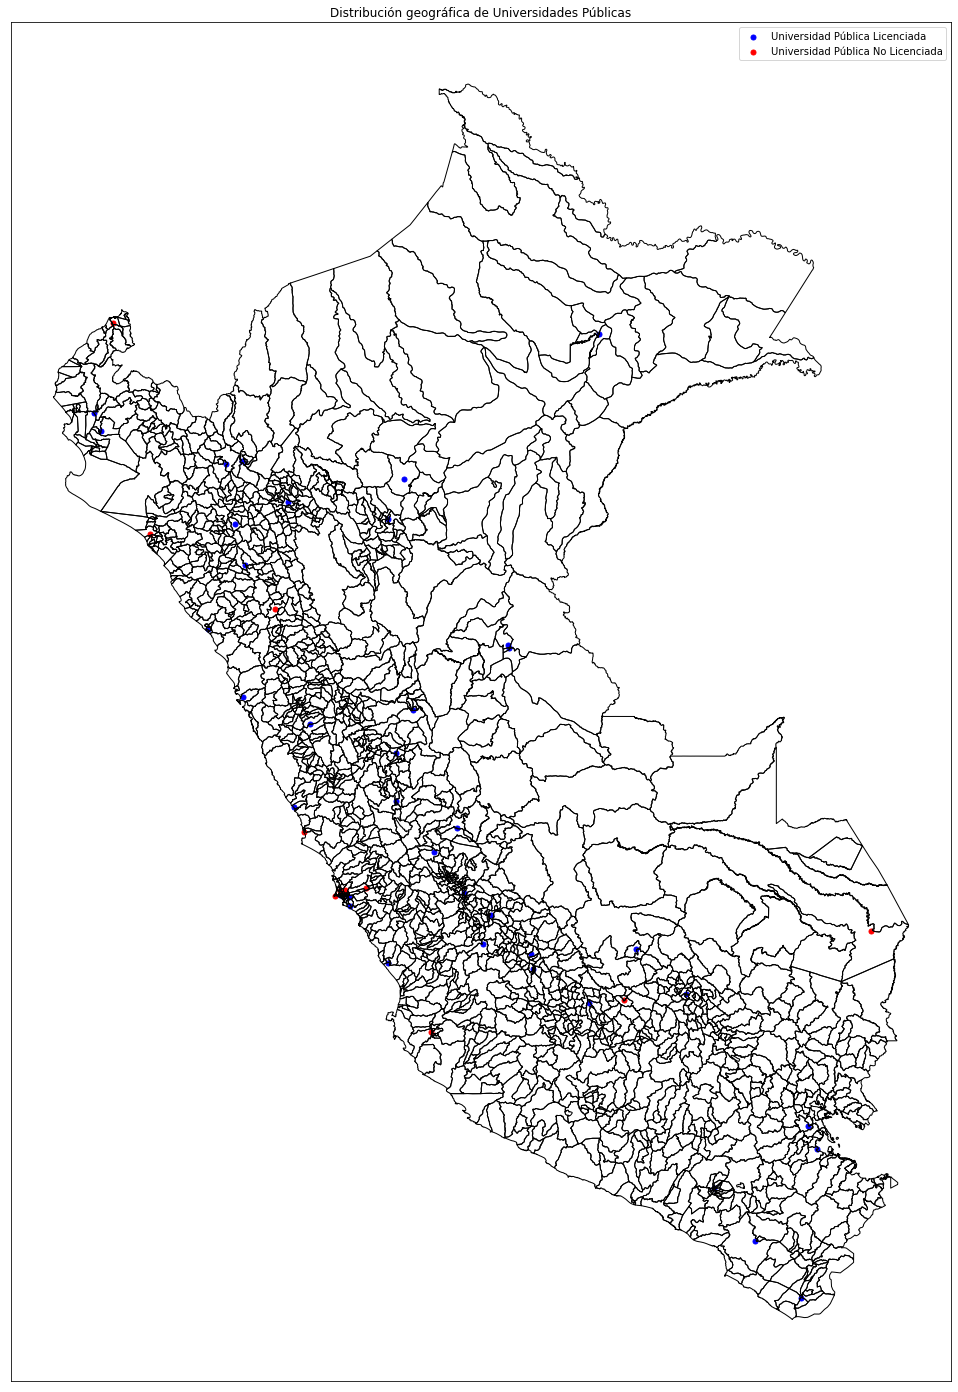

In [15]:
#Universidades publicas licenciadas
ax = mapa.plot(figsize=(25, 25), color='none', edgecolor='black', zorder=3)

publicaL.plot(color='blue', label = "Universidad Pública Licenciada", markersize=25, ax=ax)
publicaNL.plot(color='red', label = "Universidad Pública No Licenciada", markersize=25, ax=ax)

plt.title('Distribución geográfica de Universidades Públicas')
plt.xticks([])
plt.yticks([])
plt.legend(loc='upper right')

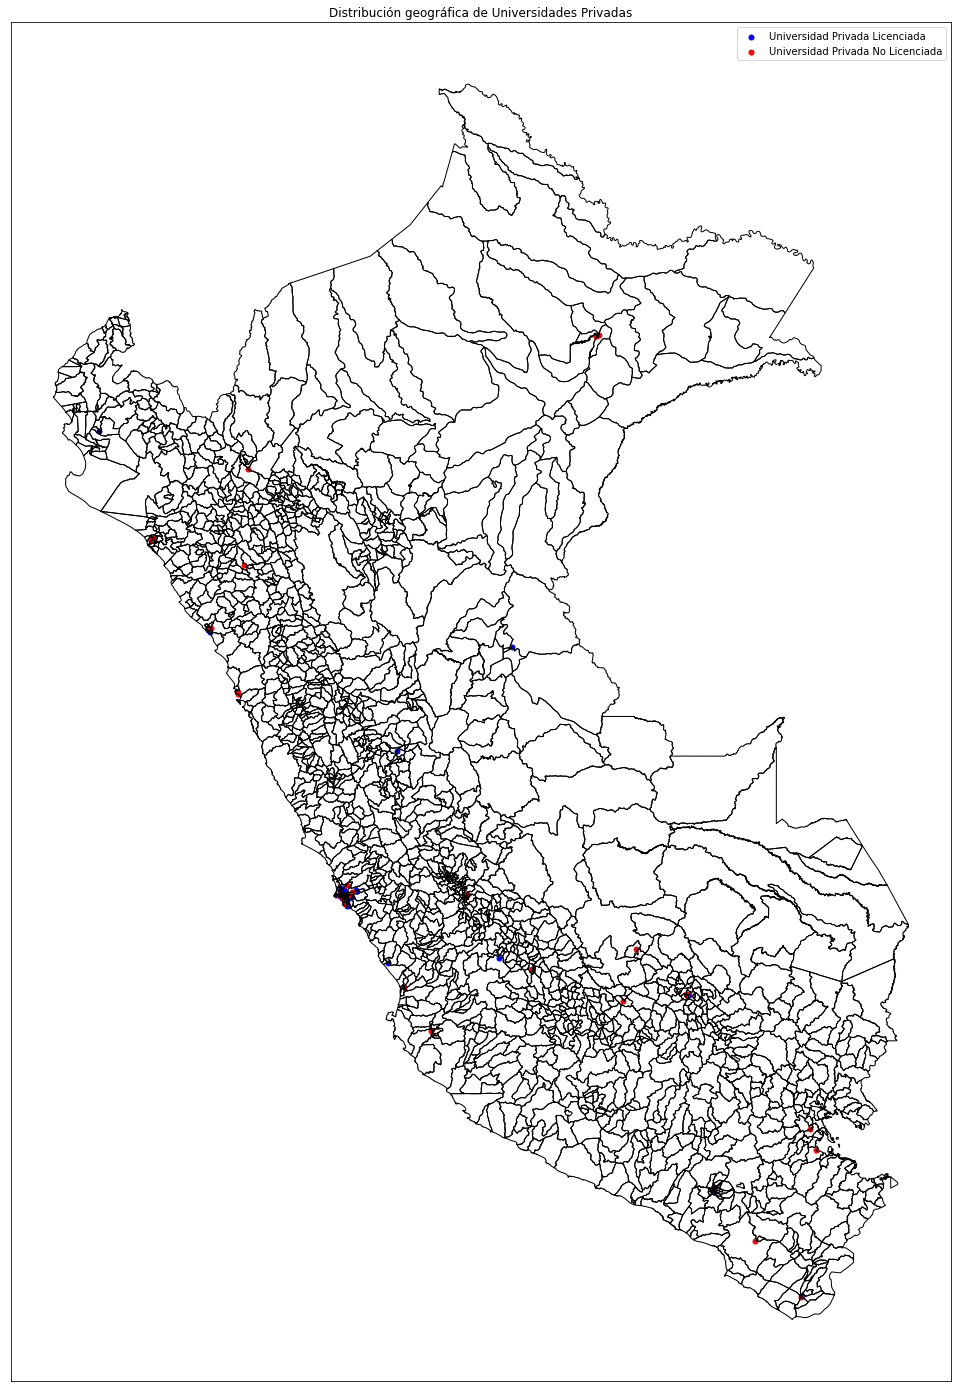

In [14]:
#Universidades privadas licenciadas
ax = mapa.plot(figsize=(25, 25), color='none', edgecolor='black', zorder=3)
privadaL.plot(color='blue', label = "Universidad Privada Licenciada", markersize=25, ax=ax)
privadaNL.plot(color='red', label = "Universidad Privada No Licenciada", markersize=25, ax=ax)

plt.title('Distribución geográfica de Universidades Privadas')
plt.xticks([])
plt.yticks([])
plt.legend(loc='upper right')